In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [122]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


In [123]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


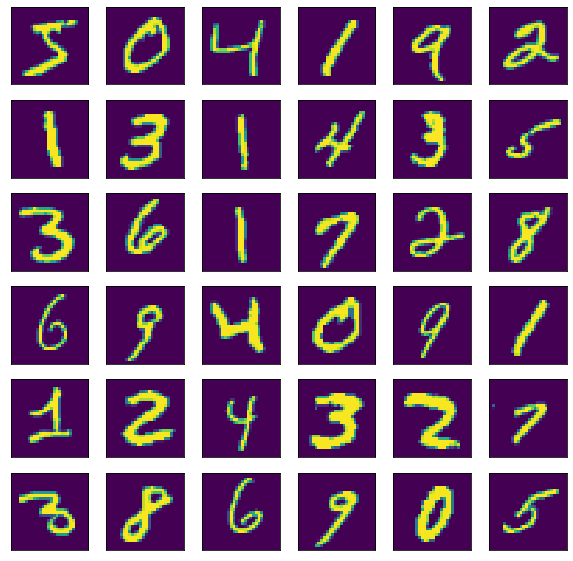

In [125]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

In [126]:
x_train=x_train.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.reshape(x_test.shape[0], 28,28,1)
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D( (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax"),
])


In [127]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)              

In [128]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=(['accuracy']))

In [56]:
history = model.fit(x_train, y_train, epochs=10,
                   validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 56s 938us/sample - loss: 0.2051 - accuracy: 0.9489 - val_loss: 0.0606 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 54s 901us/sample - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0488 - val_accuracy: 0.9854
Epoch 3/10
60000/60000 [==============================] - 54s 903us/sample - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 4/10
60000/60000 [==============================] - 54s 903us/sample - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0458 - val_accuracy: 0.9860
Epoch 5/10
60000/60000 [==============================] - 55s 921us/sample - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0609 - val_accuracy: 0.9837
Epoch 6/10
60000/60000 [==============================] - 53s 876us/sample - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 7/10
60000/60000 [====================

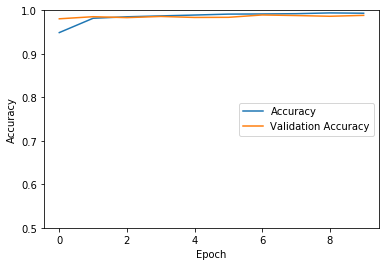

In [129]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='right')
plt.show()

In [134]:
test_loss, test_acc =model.evaluate(x_test,y_test,verbose=2)

10000/1 - 2s - loss: 25.5164 - accuracy: 0.1210


In [138]:
print('Test Loss:', test_loss)
print('Test Accuracy:' , test_acc)

Test Loss: 24.331699743652344
Test Accuracy: 0.121
